# **CD2201-16: Ciencia de Datos en Astronomía**

**Profesores:** Boris Cuevas, Paula Díaz, Danilo Sepúlveda, Francisco Urbina
# **Tarea 1: Introducción a Numpy, Pandas y Matplotlib**

El objetivo de esta tarea es repasar y aprender contenidos básicos de estas librerías que les serán útiles para el resto del curso.

Recordar las instrucciones mencionadas en clases:
1. Para hacer esta tarea tienen que hacer un fork del repositorio en sus
cuentas de GitHub.
2. Luego deben habilitar sus cuentas de Google Colab (cuenta Google requerida)
3. Abrir Google Colab y seleccionar "abrir un archivo desde GitHub". Deben seleccionar su cuenta Github y escoger el repositorio que corresponde al fork que hicieron.
4. Si todo sale bien, debería abrirse una copia de este notebook en su cuenta de Google Colab.
5. Cada vez que completen un ítem, deben guardar un avance en su fork de GitHub, de modo de respaldar cada avance significativo. Usen comentarios coherentes con cada respaldo "Sección de Numpy completada", "Tarea terminada", no solamente el que pone por defecto.

In [1]:
# Antes de comenzar con la tarea debe correr esta celda para importar las librerías principales a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Numpy (Tiempo estimado: 15 min)

Una de las características principales que vuelven a Numpy tan útil son sus capacidades algebráicas, y la posibilidad de trabajar con conjuntos de datos de N dimensiones, lo que permite acelerar cálculos. Para destacar esto, a continuación se hacen una serie de ejercicios simples donde se pide que realicen las mismas operaciones usando Numpy y las listas de Python, y que luego comparen cuánto tarda cada operación.

Para visualizar la velocidad de Numpy respecto a las listas de Python, deberán correr las funciones que se les pide a continuación con $\textit{%timeit}$, de la siguiente manera:

```
%timeit nombre_funcion(parametro_1, parametro_2)
```

Esto entregará como output el tiempo medio que toma en correr la función y la desviación estándar


### Crear arreglos y listas
A continuación debes crear un par de listas de Python y un par de arreglos de Numpy. Estos arreglos son los que se utilizarán para testear las funciones que crearás en las celdas siguientes.

La primera lista debe ser una secuencia de números enteros desde 1 hasta 49. La segunda debe ir desde 101 hasta 149. Lo mismo para los arreglos.

In [2]:
# Cree las listas aquí
a_list = list(range(1, 50))
b_list = list(range(101, 150))

# Cree los arreglos aquí
a_arr = np.arange(1, 50)
b_arr = np.arange(101, 150)

### Suma de listas de elementos

* Cree la función $\textbf{suma_listas}$, que sume 2 listas de python $a$ y $b$.
* Cree la función $\textbf{suma_arrays}$, que sume 2 arrays de numpy $a$ y $b$.
* Compare la eficiencia de las 2 funciones utilizando $\textit{%timeit}$ para cada una

In [14]:
# Cree las funciones aquí
def suma_listas(a, b):
  new_list = list() #lista que va a ser el resultado de la suma de ambas

  for i in range(max(len(a), len(b))):
    a_element = 0 #elemento de a
    b_element = 0 #elemento de b

    #asignamos un valor al elemento de a dependiendo de si existe en la lista o no
    if i+1 > len(a):
      a_element = 0
    else:
      a_element = a[i]

    #asignamos un valor al elemento de b dependiendo de si existe en la lista o no
    if i+1 > len(b):
      b_element = 0
    else:
      b_element = b[i]

    new_list.append(a_element+b_element)

  return new_list

def suma_arrays(a, b):
  new_list = np.add(a, b)
  return new_list

In [17]:
# Compare el tiempo aquí
%timeit suma_listas(a_list, b_list)
%timeit suma_arrays(a_arr, b_arr)

18.6 µs ± 3.37 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
956 ns ± 338 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### Multiplicación de listas de elementos

* Cree la función $\textbf{mupliply_listas}$, que multiplique 2 listas de python $a$ y $b$
* Cree la función $\textbf{mupliply_arrays}$, que multiplique 2 listas de python $a$ y $b$
* Compare la eficiencia de las 2 funciones utilizando $\textit{%timeit}$ para cada una

In [21]:
# Cree las funciones aquí
def multiply_listas(a, b):
  new_list = list() #lista que va a ser el resultado de la suma de ambas

  for i in range(max(len(a), len(b))):
    a_element = 1 #elemento de a
    b_element = 1 #elemento de b

    #asignamos un valor al elemento de a dependiendo de si existe en la lista o no
    if i+1 > len(a):
      a_element = 0
    else:
      a_element = a[i]

    #asignamos un valor al elemento de b dependiendo de si existe en la lista o no
    if i+1 > len(b):
      b_element = 0
    else:
      b_element = b[i]

    new_list.append(a_element*b_element)

  return new_list

def multiply_arrays(a, b):
  new_list = np.multiply(a, b)
  return new_list

In [22]:
# Compare el tiempo aquí
%timeit multiply_listas(a_list, b_list)
%timeit multiply_arrays(a_arr, b_arr)

19.7 µs ± 4.37 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
876 ns ± 85.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### Aplicación práctica (IMF de Salpeter)

Las Funciones de Masa Inicial (IMF) son muy útil es astronomía pues nos da cuenta de un estimado del número de estrellas que se van a formar en un periodo de formación estelar a partir de un reservorio de masa M [referencia](https://es.wikipedia.org/wiki/Función_de_masa_inicial), lo que permite estudiar poblaciones estelares. En particular, si tenemos un rango de masas $[M_1, M_2]$, se puede demostrar que el número de estrellas que nacerán de un reservorio de masa $\xi_0$ (ignorar unidades) está dada por ecuación $(1)$

$$N = \frac{\xi_0}{1.35} (M_1^{-1.35} - M_2^{-1.35}) \tag{1}$$

Para esta prueba usted debe:

* Crear un array de masas $\textbf{lista_masas}$ que vaya desde $0.2 M_{\odot}$ hasta $80 M_{\odot}$, con pasos de $0.05 M_{\odot}$. Note que para este ejercicio puede ignorar la unidad de la masa.
* Recrear la ecuación $(1)$ como función en python. Considere $\xi_0=1$
* Calcular el número de estrellas que se formarán por intervalo de $\textbf{lista_masas}$, en $[0.2, 0.25], [0.25, 0.3], [0.3, 0.35], ..., [79.9, 79.95] y [79.95, 80]$ utilizando Numpy.
* Luego calcule el número total de estrellas formadas, es decir, sume todos los números de estrellas calculados en el punto anterior.


In [23]:
# Cree el arreglo
lista_masas = np.arange(0.2, 80.05, 0.05)

In [24]:
# Cree la función que se le pide
def IMF(m1, m2):
  a = 1/1.35
  m1_elevado = pow(m1, -1.35)
  m2_elevado = pow(m2, -1.35)
  dif = m1_elevado-m2_elevado
  N = a*dif

  return N

In [30]:
# Haga los cálculos aquí

n_stars_per_interval = list()
N_total = 0

for i in range(len(lista_masas)-1):
  N = IMF(lista_masas[i], lista_masas[i+1])
  n_stars_per_interval.append(N)

for N in n_stars_per_interval:
  N_total+= N

print(N)

1.6866601161360428e-06


## 2. Pandas (Tiempo estimado 20 min)

Para esta sección veremos algunas de las funciones principales que existen dentro de pandas, dando una pincelada a sus capacidades. Como recomendación, puede explorar la [documentación](lista_masas), y mirar el tutorial [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html), pero no es obligatorio para esta parte.

### Creación de datos

Recree el siguiente DataFrame **almacen**:


|        | Manzana | Frutilla | Melón |
|--------|---------|----------|-------|
| Stock inicial  | 25      | 80       | 15    |
| Ventas | 14      | 60       | 6     |


In [31]:
data = {'Fruta': ['Manzana', 'Frutilla', 'Melón'],
 'Stock inicial': [25, 80, 15],
 'Ventas': [14, 60, 6]}

almacen = pd.DataFrame(data, columns=['Fruta', 'Stock inicial', 'Ventas'])

Haga ahora un inventario de la cantidad que queda por producto después de las ventas, y añada la fila **bodega** con esta información.

In [41]:
s_inicial =  almacen['Stock inicial'] #recupera el valor de los stocks iniciales
ventas =  almacen['Ventas'] #recupero el valor de las ventas
bodega = np.subtract(s_inicial, ventas) #resto 2 array usando la funcion de np
almacen['Bodega'] = bodega #estoy añadiendo una columna Bodega y le asigna la data del array bodega

### Visualización de Tablas
Para esta parte primero debe montar el drive, lo que permite leer archivos guardados en el mismo. Para esto debe correr la celda de abajo.

In [43]:
from google.colab import drive
drive.mount('/content/drive')    # se le debe abrir una pestaña extra pidiendo permisos

Mounted at /content/drive


Importe el dataset (archivo **censo.csv**) utilizando la función **pd.load_csv(path)** y guárdelo como **df_censo**.

En la barra de herramientas ubicada en la izquierda, puede encontrar la ruta (path) al archivo "censo.csv" dentro de su drive. Copie la ruta y cargue dicha base de datos en la siguiente celda como se le indica.

In [69]:
path = '/content/drive/MyDrive/censo.csv'
df_censo = pd.read_csv(path)

Con este dataset se pide hacer lo siguiente:

* Vea los primeros 10 elementos de $\textbf{df_censo}$
* Vea las columnas del dataframe
* Traduzca las columnas a español (manualmente).
* Use la función $\textbf{describe}$ para visualizar la estadística de cada columna del dataframe. ¿Ve algo que no tiene sentido?

In [70]:
# Agregue más celdas si es necesario
elements = df_censo.head(10) #recuperamos los primeros 10 elementos
print(elements) # vemos los elementos

columns = df_censo.columns #recuperamos las columnas
print(columns) #vemos las columnas

                               name        city  age  n_siblings
0      Paula_Miguel_Garcia_Gonzalez     Iquique   35           0
1         Maria_Pedro_Jimenez_Lopez    Rancagua   49          -1
2    Carolina_Juan_Jimenez_Gonzalez     Iquique   16           1
3          Lucia_Marta_Jimenez_Sanz    Santiago   42           2
4         Marta_Roberto_Garcia_Sanz  Valparaiso   12           3
5         Roberto_Paula_Lopez_Gomez       Arica   38          -2
6  Pedro_Valentina_Garcia_Hernandez    Santiago   40           0
7         Sofia_Marta_Garcia_Garcia    Santiago   10           1
8   Carolina_Eduardo_Perez_Gonzalez    Santiago   40           0
9     Pedro_Julia_Gonzalez_Gonzalez    Santiago   55           0
Index(['name', 'city', 'age', 'n_siblings'], dtype='object')


In [71]:
#traducimos el nombre de las columnas
df_censo.columns = ['nombre', 'ciudad', 'edad', 'n_hermanos']

In [72]:
desc = df_censo.describe()
print(desc)

#no tiene sentido que el min de edad y de hermanos sea un numero negativo

              edad  n_hermanos
count  2000.000000  2000.00000
mean     34.286500     0.75000
std      14.724158     1.73234
min     -26.000000    -6.00000
25%      24.000000     0.00000
50%      34.000000     0.00000
75%      44.000000     2.00000
max      84.000000     7.00000


### Filtar los datos

Repare el dataframe siguiendo los siguientes pasos:

* Descarte los elementos del dataframe donde la edad sea menor a cero.
* Reemplace los casos en que el número de hermanos es menor a cero por cero.
* Descarte los casos en que el mismo nombre aparezca más de una vez (use la función [drop_duplicates](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html#pandas.DataFrame.drop_duplicates) y mantenga el primer elemento: keep = 'first').


In [73]:
df_censo = df_censo[df_censo['edad'] > 0] #descartamos elementos donde la edad sea menor a 0

In [74]:
df_censo.loc[df_censo['n_hermanos']<0, 'n_hermanos'] = 0 #seleccionamos los datos en la columna n_hermanos que sean menores que cero e igualamos a 0

In [61]:
df_censo.drop_duplicates('nombre', keep='first')

,nombre,ciudad,edad,n_hermanos
0,Paula_Miguel_Garcia_Gonzalez,Iquique,35,0
1,0,0,0,0
2,Carolina_Juan_Jimenez_Gonzalez,Iquique,16,1
3,Lucia_Marta_Jimenez_Sanz,Santiago,42,2
4,Marta_Roberto_Garcia_Sanz,Valparaiso,12,3
...,...,...,...,...
1993,Javier_Eduardo_Hernandez_Martinez,Curico,66,1
1996,Miguel_Carlos_Zapata_Garcia,Santiago,43,0
1997,Diego_Diego_Zapata_Sanz,Valparaiso,43,1
1998,Julia_Sofia_Gonzalez_Sanz,Curico,42,1


## 3. Matplotlib

Matplotlib es la librería que nos permitirá crear todo tipo de figuras para visualizar nuestros datos ([documentación](https://matplotlib.org/stable/index.html)). A pesar de su popularidad, no posee una gran versatilidad al momento de hacer una visulización interactiva. Sin embargo,su fiabilidad y simplicidad la han hecho una de las librerías fundamentales para la ciencia de datos en Python.

### Visualización simple

Genere un arreglo de 100 números que vayan desde 0 a 4$\pi$.

In [75]:
x_values = np.linspace(0, 4 * np.pi, 100)

Utilizando las funciones **np.sin()** y **np.cos()** de numpy, cree la siguiente función:
$$f(x) = 1.5[\sin(3x+\pi/4)+\cos(2x)] \tag{2}$$

Luego aplique la función al arreglo generado en la celda de arriba y grafique. Haga el plot sin crear una figura, es decir solo usando el comando **plt.plot(x, y)**.


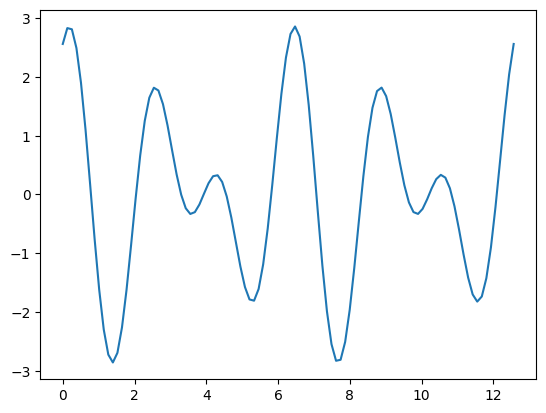

In [76]:
# Escriba la función aquí
def f(x):
  return 1.5*(np.sin(3*x + np.pi/4) + np.cos(2*x))

y_values = list()

for x in x_values:
  y_values.append(f(x))

# Haga el plot aquí
plt.plot(x_values, y_values)

Ahora incluya también en el plot la misma función  pero con un poco de ruido. Para esto simplemente debes sumar la variable **ruido** definida abajo a la función.

Plotee la función ruidosa de color rojo, y en azul la función sin ruido. Incluya además una leyenda con **plt.legend()**. Ojo que para que aparezca la leyenda de la figura, en **plt.plot()** debe incluir el parámetro **label**

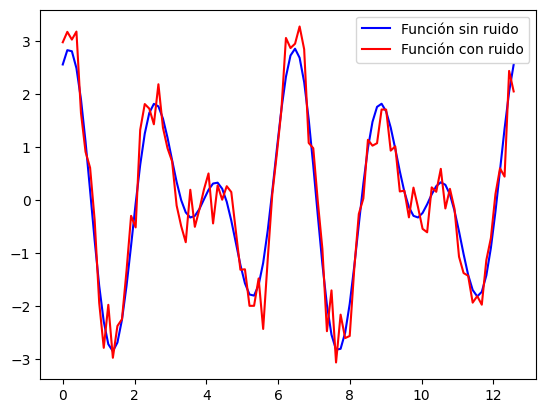

In [78]:
np.random.seed(19680801) # por ahora ignorar esto
ruido = 0.4*np.random.randn(len(x_values))

y_ruido = np.add(y_values, ruido)

# Línea para plotear función sin ruido
plt.plot(x_values, y_values, color='blue', label='Función sin ruido')

# Línea para plotear función con ruido
plt.plot(x_values, y_ruido, color='red', label='Función con ruido')

plt.legend()

Es una buena práctica también el siempre inicializar una figura. Esto además permite definir un tamaño al plot que se va a generar. Use **plt.figure(figsize=(size_x, size_y))** para cambiar el tamaño de la figura y recree todo lo que hizo en la celda anterior.


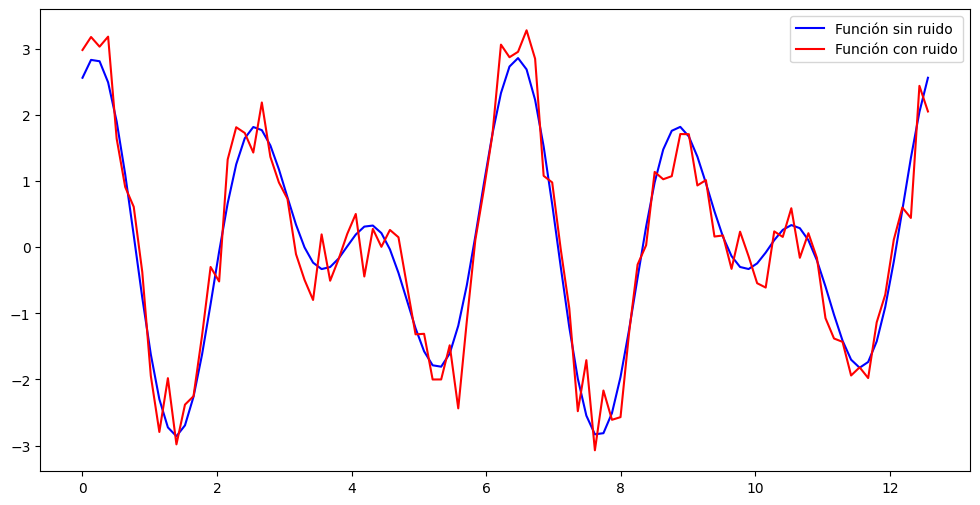

In [80]:
#configuramos la figura
plt.figure(figsize=(12, 6))

#plot de la función sin ruido en azul
plt.plot(x_values, y_values, color='blue', label='Función sin ruido')

#plot la función con ruido en rojo
plt.plot(x_values, y_ruido, color='red', label='Función con ruido')

#añadir leyenda
plt.legend()

#mostramos la figura
plt.show()

Para estas funciones, sabemos que tiene un mayor sentido definir el eje x en función de $\pi$ en lugar de números enteros. Haga de nuevo la figura pero ahora utilize la función **plt.xticks()** para reescribir los valores de x como múltiplos de $\pi$. Utilice como labels la lista **xticks_labels** que ya está definida.

Además, tenga en cuenta que se puede escribir texto en latex de la siguiente forma:
```
r'$\pi$'
```



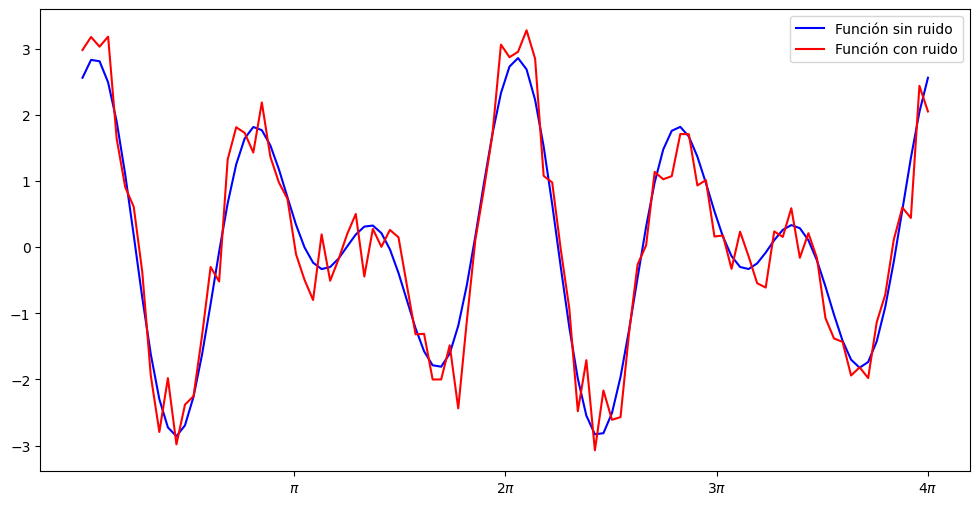

In [83]:
xticks_labels = [r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$']
valores = [np.pi, 2*np.pi, 3*np.pi, 4*np.pi]

#configuramos la figura
plt.figure(figsize=(12, 6))

#plot de la función sin ruido en azul
plt.plot(x_values, y_values, color='blue', label='Función sin ruido')

#plot la función con ruido en rojo
plt.plot(x_values, y_ruido, color='red', label='Función con ruido')

#añadimos leyenda
plt.legend()

#cambiamos el eje x
plt.xticks(valores, xticks_labels)

#mostramos la figura
plt.show()

Como ultimo paso, agregue una grilla con **plt.grid(True)**. Además añada un título a la figura y labels en ambos ejes (x e y) que tengan sentido.


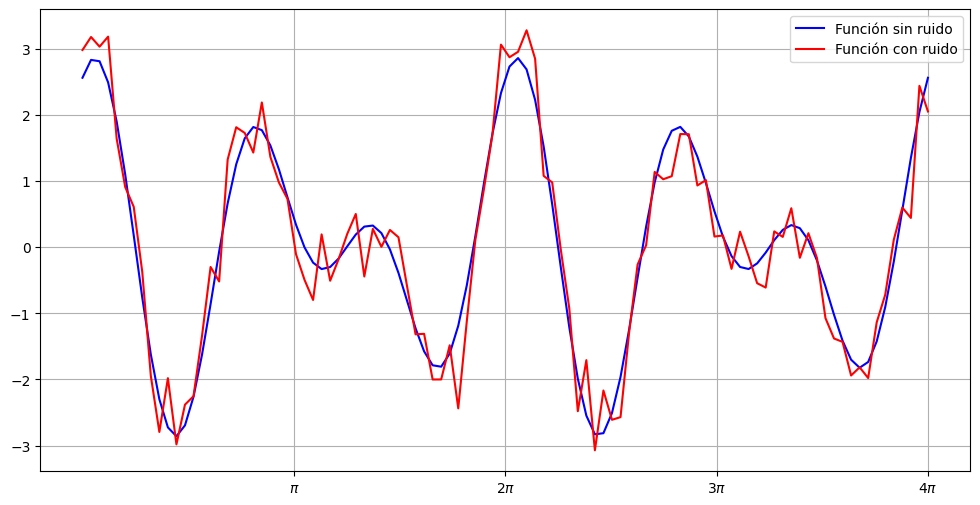

In [93]:
xticks_labels = [r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$']
valores = [np.pi, 2*np.pi, 3*np.pi, 4*np.pi]

#configuramos la figura
plt.figure(figsize=(12, 6))

#plot de la función sin ruido en azul
plt.plot(x_values, y_values, color='blue', label='Función sin ruido')

#plot la función con ruido en rojo
plt.plot(x_values, y_ruido, color='red', label='Función con ruido')

#añadimos grilla
plt.grid(True)

#añadimos titulo y titulos de los ejes
plt.title='Función con ruido (rojo) vs sin ruido (azul)'
plt.ylabel='f(x)'
plt.xlabel='radianes'

#añadimos leyenda
plt.legend()

#cambiamos el eje x
plt.xticks(valores, xticks_labels)

#mostramos la figura
plt.show()

### Visualización distribución de estrellas

El archivo **galaxy2.csv** contiene datos de la posición de estrellas sintéticas de una galaxia. Al igual que en la sección anterior, cargue los datos utilizando **pd.read_csv()**.

In [94]:
# Carge y abra el archivo
path = '/content/drive/MyDrive/galaxy2.csv'
df = pd.read_csv(path)

Vea los primeros 10 elementos del dataframe. ¿Qué tipo de información puede encontrar? Dado el nombre de las columnas, ¿en qué unidades se encuentran?

**Respuesta:** la columna key no tiene unidades, las columnas x, y y z están en metros y vx, vy y vz en metros por segundo

In [95]:
df.head(10)

,key,x[m],y[m],z[m],vx[m/s],vy[m/s],vz[m/s]
0,2536799254509432540,9.016510e+17,4.745163e+17,3.009401e+16,-1.625572e+06,2.845114e+06,-3.486599e+04
1,16568176108934293527,-9.545587e+16,-2.795457e+17,-2.217165e+16,1.855060e+06,-1.920465e+06,-2.893263e+05
2,212848180443948653,4.908724e+17,-1.870607e+18,9.142949e+15,3.380713e+06,7.971010e+05,4.905219e+04
3,584293945272726282,-8.367689e+17,-2.974291e+17,-4.054180e+15,6.618865e+05,-3.375086e+06,2.686391e+05
4,15485527814176396751,2.343487e+16,2.799849e+17,-2.554723e+16,-2.484394e+06,-1.171416e+05,-5.705734e+05
5,3355351822461698455,-5.025008e+17,-8.725557e+17,-5.071959e+15,2.700085e+06,-2.203650e+06,-1.303846e+05
6,11306543906972088773,-7.294104e+16,2.996010e+17,2.552034e+16,-3.080776e+06,-1.458240e+06,1.005820e+06
7,783275702291551918,4.886403e+16,-1.366570e+18,4.799806e+14,3.573072e+06,3.520636e+04,-2.359365e+03
8,2994623897157713080,-1.850651e+17,1.004086e+18,-5.464441e+15,-3.330370e+06,-7.812421e+05,-7.749480e+04
9,13439637019970929881,1.918695e+17,1.011757e+17,2.188518e+16,-1.188553e+06,2.041306e+06,-5.645056e+05


Plotee las estrellas en el plano $[x, y]$ utilizando **plt.plot()**. Para hacer esto hay que plotear solo los marcadores, esto se puede hacer con: **marker=' . ', linestyle='  '**, o simplemente con **' . '**. Recuerde agregar los labels en cada eje.

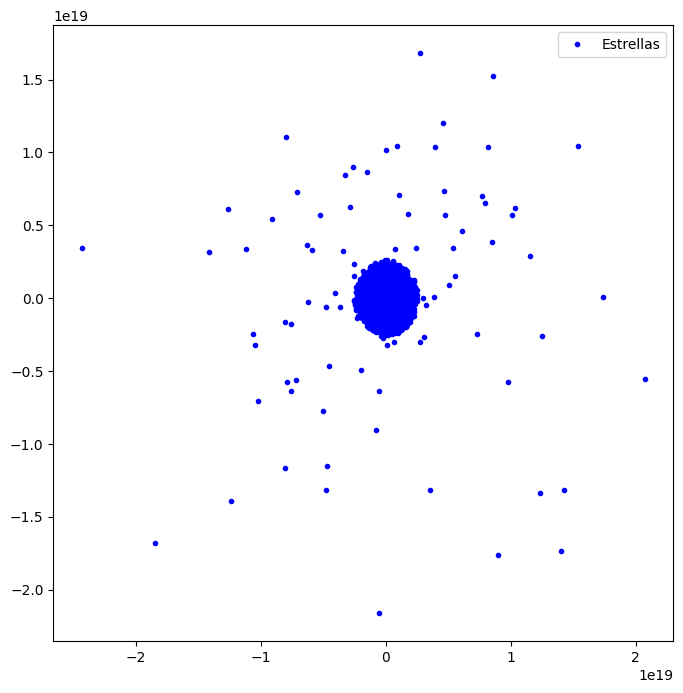

In [104]:
x = df['x[m]']
y = df['y[m]']

plt.figure(figsize=(8, 8))

#plot de las estrellas con solo los marcadores
plt.plot(x, y, '.', color='blue', label='Estrellas')

#configurar las etiquetas de los ejes
plt.xlabel = 'Posición en eje X'
plt.ylabel = 'Posición en eje Y'

#añadir la leyenda
plt.legend()

#mostrar la figura
plt.show()

Se puede ver que muchas de las estrellas se extienden muy lejos de la galaxia. Para simplificar la visualización setee un **plt.xlim()** y **plt.ylim()** en el rago que considere que funcione mejor (Recomendación, como los números son muy grandes, use la notación $1eN$, con $N$ el orden de magnitud, para facilitar la escritura).

Adicionalmente, cuando se trabaja con marcadores, podemos usar el parámetro **markersize** para modificar su tamaño. El plot anterior muestra con bastante claridad las estrellas que están más lejanas, pero dificulta la visualización de las regiones más centrales de la galaxia. Actualice el tamaño de los marcadores a $0.5$, de manera que sea más suave la visualización de la distribución de estrellas. Plotee además las estrellas vistas en el plano $[x, y]$, $[x, z]$, $[y, z]$.

Recuerde agregar los labels en cada eje.

Póngase creativo con los gráficos, defina tamaños de la figura, agregue colores, defina los tamaños de los labels, etc.

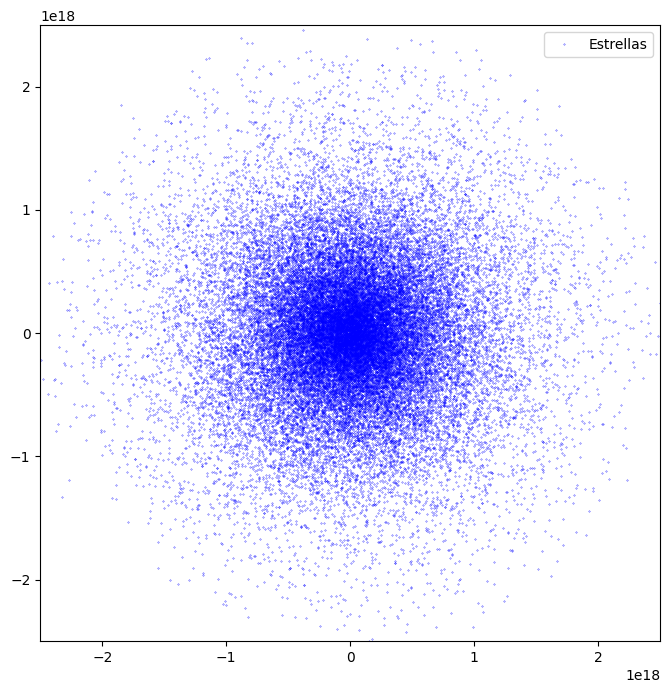

In [111]:
# Grafique vista en plano [x, y] aquí
x = df['x[m]']
y = df['y[m]']

plt.figure(figsize=(8, 8))

#plot de las estrellas con solo los marcadores
plt.plot(x, y, '.', color='blue', label='Estrellas', markersize=0.5)

#Set limits for x-and y-axis
plt.xlim([-0.25e19, 0.25e19])
plt.ylim([-0.25e19, 0.25e19])

#configurar las etiquetas de los ejes
plt.xlabel = 'Posición en eje X'
plt.ylabel = 'Posición en eje Y'

#añadir la leyenda
plt.legend()

#mostrar la figura
plt.show()

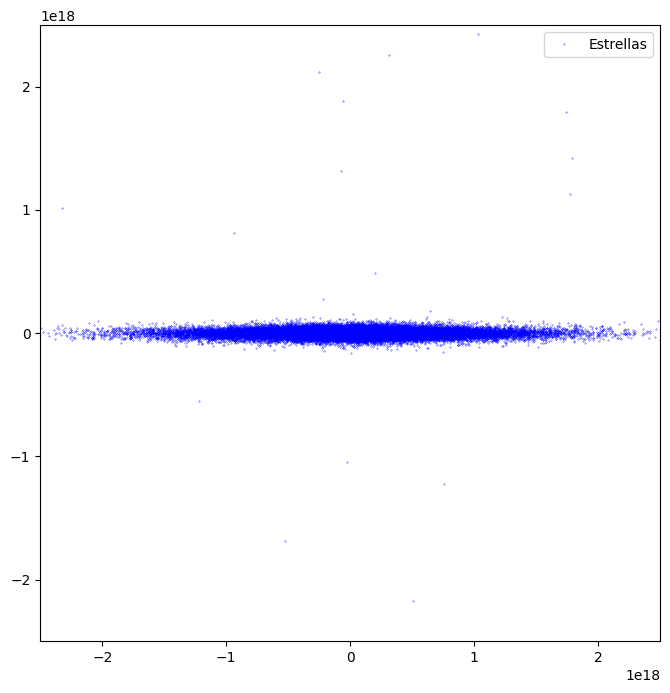

In [112]:
# Grafique vista en plano [x, z] aquí
x = df['x[m]']
y = df['z[m]']

plt.figure(figsize=(8, 8))

#plot de las estrellas con solo los marcadores
plt.plot(x, y, '.', color='blue', label='Estrellas', markersize=0.5)

#Set limits for x-and y-axis
plt.xlim([-0.25e19, 0.25e19])
plt.ylim([-0.25e19, 0.25e19])

#configurar las etiquetas de los ejes
plt.xlabel = 'Posición en eje X'
plt.ylabel = 'Posición en eje Y'

#añadir la leyenda
plt.legend()

#mostrar la figura
plt.show()

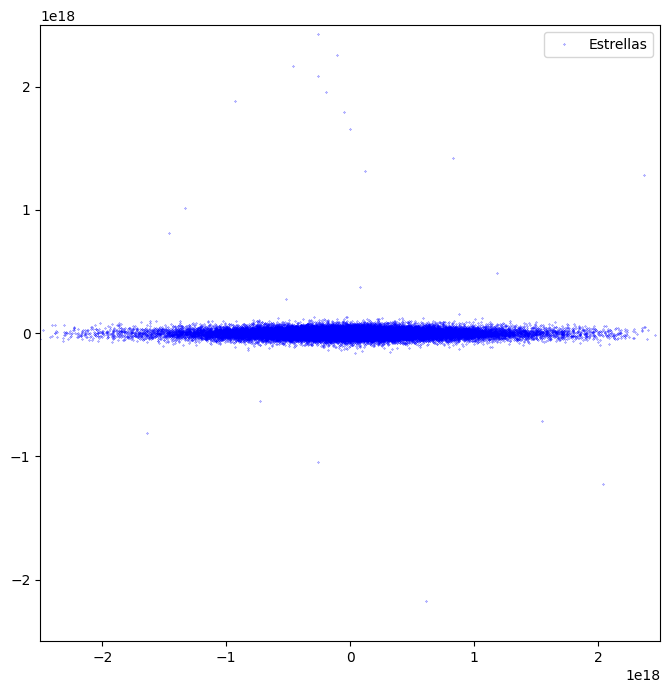

In [113]:
# Grafique vista en plano [y, z] aquí
x = df['y[m]']
y = df['z[m]']

plt.figure(figsize=(8, 8))

#plot de las estrellas con solo los marcadores
plt.plot(x, y, '.', color='blue', label='Estrellas', markersize=0.5)

#Set limits for x-and y-axis
plt.xlim([-0.25e19, 0.25e19])
plt.ylim([-0.25e19, 0.25e19])

#configurar las etiquetas de los ejes
plt.xlabel = 'Posición en eje X'
plt.ylabel = 'Posición en eje Y'

#añadir la leyenda
plt.legend()

#mostrar la figura
plt.show()

#### Distribuciones

Calcule la distancia $r$ y ángulo $\theta$ de cada una de las estrellas y añada estos valores a las columnas del dataframe original. Donde

$r = \sqrt{x^2 + y^2 + z^2}$

$θ = \arctan(y/x)$


In [114]:
def r(x, y, z):
  return np.sqrt(x**2 + y**2 + z**2)

def theta(x, y):
  return np.arctan(y/x)

df['r[m]'] = r(df['x[m]'], df['y[m]'], df['z[m]'])
df['theta[rad]'] = theta(df['x[m]'], df['y[m]'])

Finalmente, visualize la distribución de $r$ y $\theta$ con un histograma. Esto se puede contruir desde cero con matplotlib, sin embargo pandas simplifica hacer análisis como estos, permitiendo rápidamente hacer diferentes análisis estadísticos. El siguiente codigo muestra como se puede plotear un histograma a partir de un dataframe de Pandas:


```
dataframe.plot.hist(y=column_name, bins=n_bins)
```

Utilice una escala logarítmica en el eje vertical del histograma de la coordenada radial ($r$). Use la cantidad de bins que considere que representen bien la distribución.



<Axes: ylabel='Frequency'>

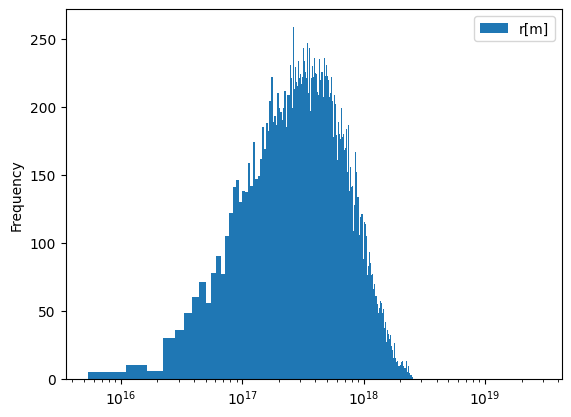

In [122]:
df.plot.hist(y='r[m]', bins=5000, logx=True)